In [1]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import acovf
from matplotlib.ticker import FormatStrFormatter
import datetime as dt
from scipy import signal
from scipy.fft import fft, ifft
from matplotlib.ticker import AutoMinorLocator
import math
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import scipy
from scipy import linalg

/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_44380/1448096363.py:8: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  x_true = scipy.linspace(x_min, x_max,50)
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_44380/1448096363.py:9: DeprecationWarning: scipy.cos is deprecated and will be removed in SciPy 2.0.0, use numpy.cos instead
  y_true = scipy.cos(x_true)


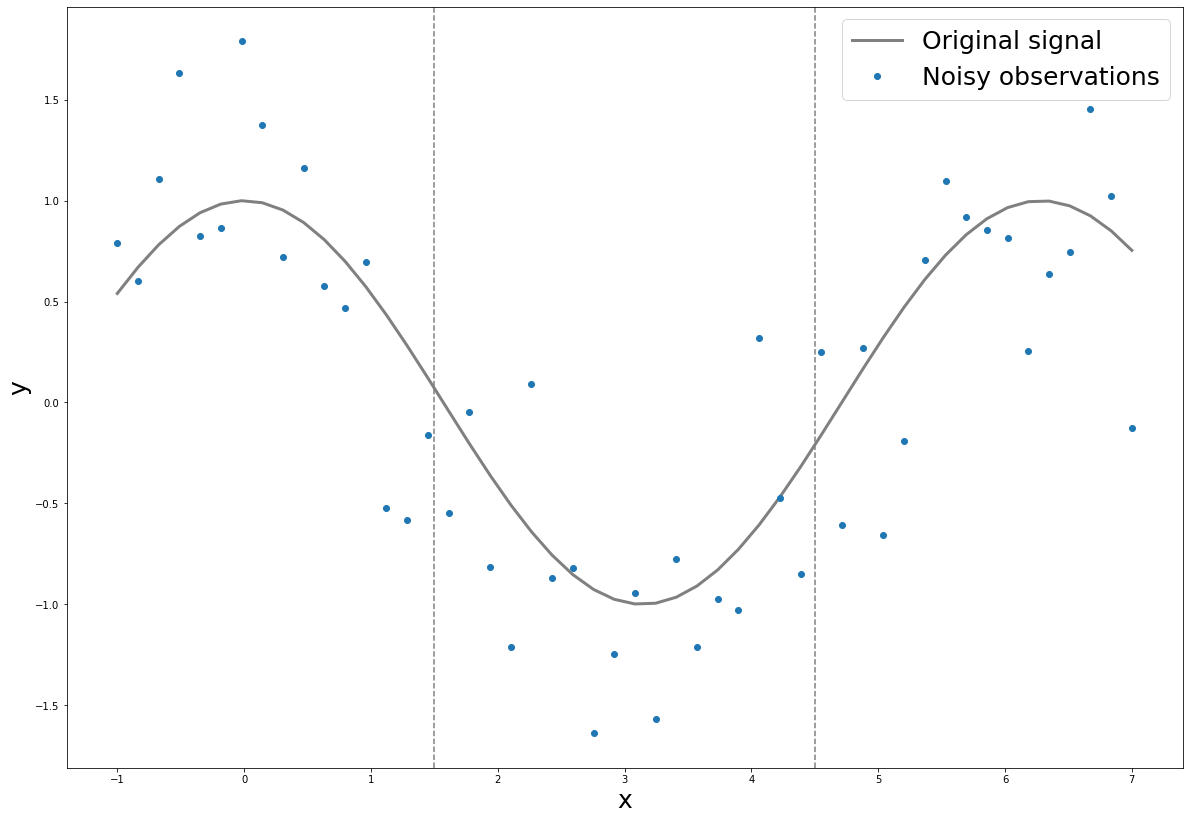

In [2]:
np.random.seed(42)

# Axes limits and knots
x_min, x_knot_1, x_knot_2, x_max = -1, 1.5, 4.5, 7


# Points generated from a cosine function with normal noise
x_true = scipy.linspace(x_min, x_max,50)
y_true = scipy.cos(x_true)
y_obs = y_true + np.random.normal(scale=0.5, size=len(x_true))

fig = plt.figure(figsize=(20, 14))
plt.plot(x_true, y_true, linewidth=3, c='gray')
plt.plot(x_true, y_obs, 'o')
# Plot knots
plt.axvline(x=x_knot_1, c='gray', ls='--')
plt.axvline(x=x_knot_2, c='gray', ls='--')
plt.xlabel('x',fontsize=25)
plt.ylabel('y',fontsize=25)
plt.legend(['Original signal','Noisy observations'],fontsize=25)
# plt.savefig('Basis_1.png')
plt.show()

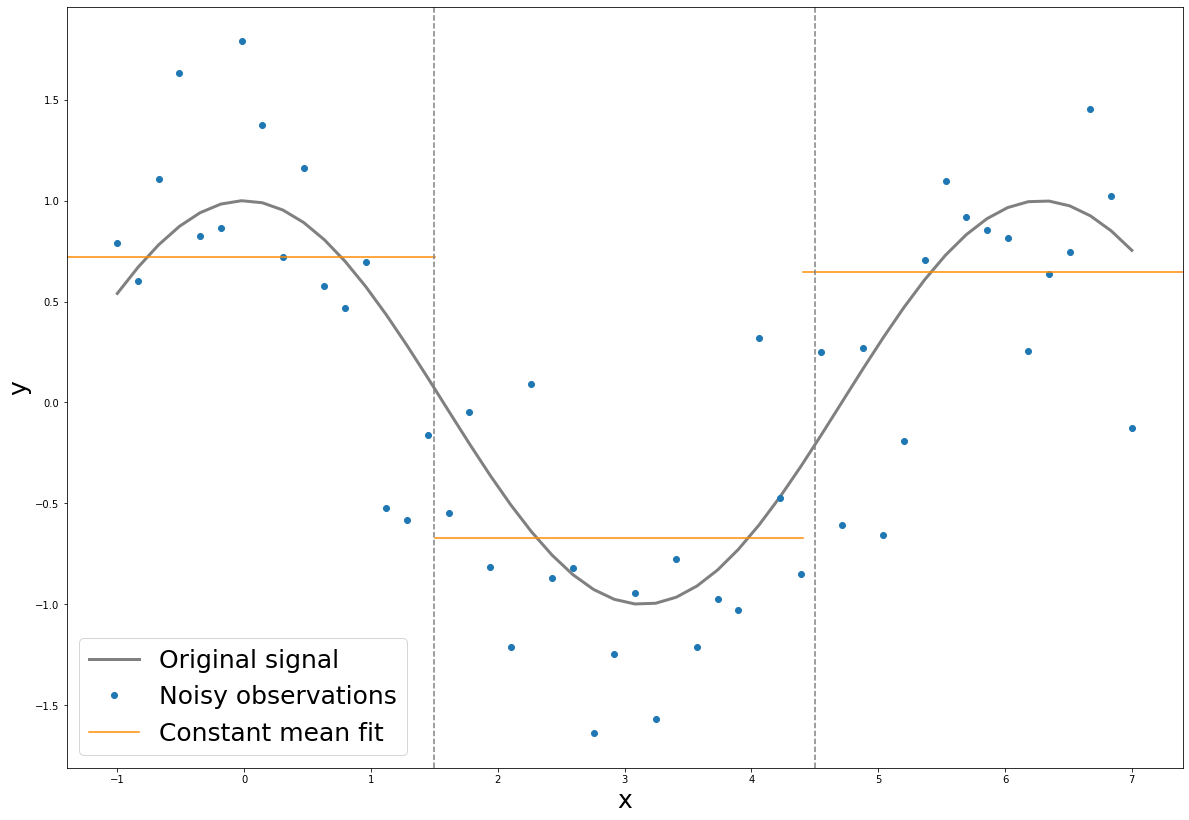

In [3]:
# Begining of titting piecewise functions to the data
# Get x-y coordinates per region
x_region_1 = x_true[x_true <= x_knot_1]
x_region_2 = x_true[(x_knot_1 < x_true) & (x_true < x_knot_2)]
x_region_3 = x_true[x_true >= x_knot_2]
y_region_1 = y_true[x_true <= x_knot_1]
y_region_2 = y_true[(x_knot_1 < x_true) & (x_true < x_knot_2)]
y_region_3 = y_true[x_true >= x_knot_2]

# Piecewise constant fit ------------------------------------------------
# Plot cosine line and noisy data
fig = plt.figure(figsize=(20, 14))
plt.plot(x_true, y_true, linewidth=3, c='gray')
plt.plot(x_true, y_obs, 'o')
# Plot piecewise constant fits
plt.axhline(y=y_region_1.mean(), c='darkorange', xmin=0, xmax=0.33)
plt.axhline(y=y_region_2.mean(), c='darkorange', xmin=0.33, xmax=0.66)
plt.axhline(y=y_region_3.mean(), c='darkorange', xmin=0.66, xmax=1)
# Plot knots
plt.axvline(x=x_knot_1, c='gray', ls='--')
plt.axvline(x=x_knot_2, c='gray', ls='--')
plt.xlabel('x',fontsize=25)
plt.ylabel('y',fontsize=25)
plt.legend(['Original signal','Noisy observations','Constant mean fit'],fontsize=25)
# plt.savefig('Basis_2.png')
plt.show()

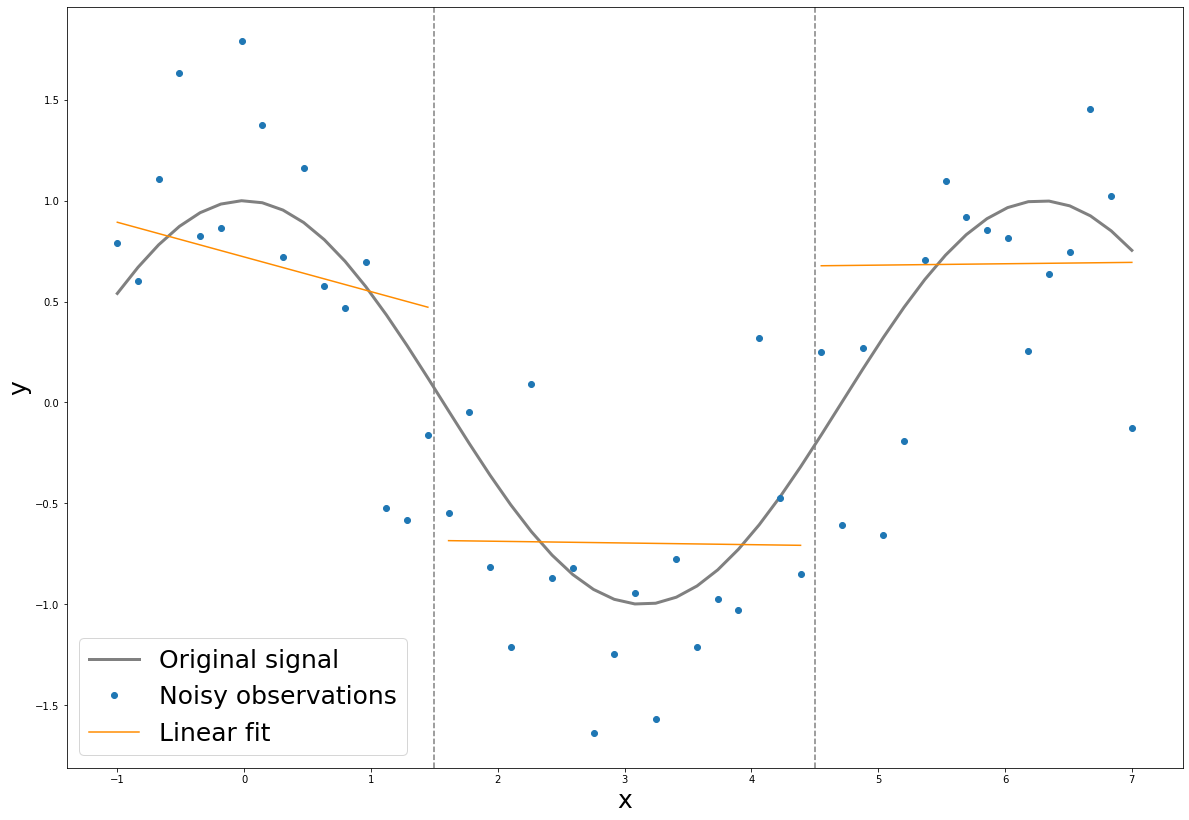

In [4]:
# Piecewise linear fit --------------------------------------------------
# Calculate OLS coefficients from regression anatomy
beta_region_1 = ((y_region_1 - y_region_1.mean()).dot(x_region_1) / 
                (x_region_1**2).sum())
beta_region_2 = ((y_region_2 - y_region_2.mean()).dot(x_region_2) / 
                (x_region_2**2).sum())
beta_region_3 = ((y_region_3 - y_region_3.mean()).dot(x_region_3) / 
                (x_region_3**2).sum())

# Calculate regression fitted values
y_hat_region_1 = beta_region_1 * x_region_1 + y_region_1.mean()
y_hat_region_2 = beta_region_2 * x_region_2 + y_region_2.mean()
y_hat_region_3 = beta_region_3 * x_region_3 + y_region_3.mean()

# Plot cosine line and noisy data
fig = plt.figure(figsize=(20, 14))
plt.plot(x_true, y_true, linewidth=3, c='gray')
plt.plot(x_true, y_obs, 'o')
# Plot piecewise linear fits
plt.plot(x_region_1, y_hat_region_1, c='darkorange')
plt.plot(x_region_2, y_hat_region_2, c='darkorange')
plt.plot(x_region_3, y_hat_region_3, c='darkorange')
# Plot knots
plt.axvline(x=x_knot_1, c='gray', ls='--')
plt.axvline(x=x_knot_2, c='gray', ls='--')
plt.xlabel('x',fontsize=25)
plt.ylabel('y',fontsize=25)
plt.legend(['Original signal','Noisy observations','Linear fit'],fontsize=25)
# plt.savefig('Basis_3.png')
plt.show()

/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_44380/1806083437.py:2: DeprecationWarning: scipy.ones_like is deprecated and will be removed in SciPy 2.0.0, use numpy.ones_like instead
  h1 = scipy.ones_like(x_true)
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_44380/1806083437.py:3: DeprecationWarning: scipy.copy is deprecated and will be removed in SciPy 2.0.0, use numpy.copy instead
  h2 = scipy.copy(x_true)
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_44380/1806083437.py:4: DeprecationWarning: scipy.where is deprecated and will be removed in SciPy 2.0.0, use numpy.where instead
  h3 = scipy.where(x_true < x_knot_1, 0, x_true - x_knot_1)
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_44380/1806083437.py:5: DeprecationWarning: scipy.where is deprecated and will be removed in SciPy 2.0.0, use numpy.where instead
  h4 = scipy.where(x_true < x_knot_2, 0, x_true - x_knot_2)
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_44380/

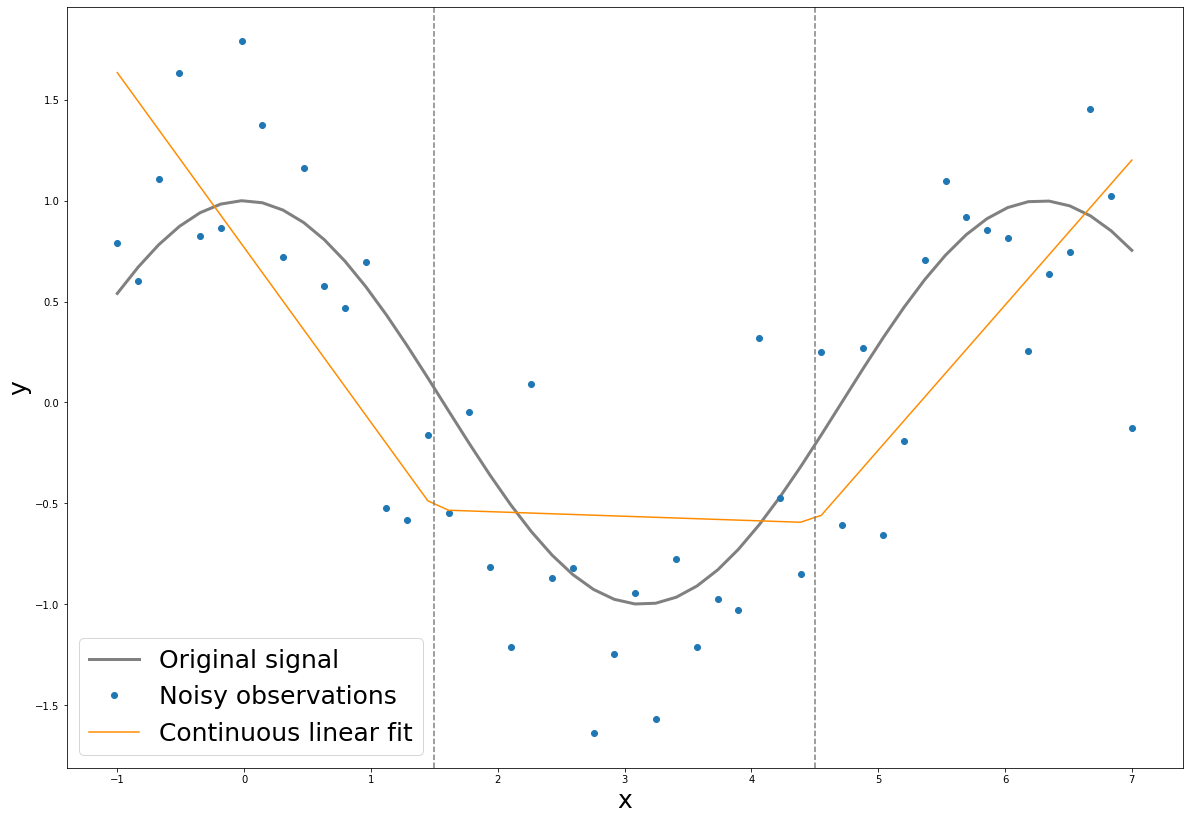

In [5]:
# Continuous Piecewise Linear -------------------------------------------
h1 = scipy.ones_like(x_true)
h2 = scipy.copy(x_true)
h3 = scipy.where(x_true < x_knot_1, 0, x_true - x_knot_1)
h4 = scipy.where(x_true < x_knot_2, 0, x_true - x_knot_2)
H = scipy.vstack((h1, h2, h3, h4)).T
# Fit basis expansion via OLS
HH = H.T @ H
beta = scipy.linalg.solve(HH, H.T @ y_obs)
y_hat = H @ beta

# Plot cosine line and noisy data
fig = plt.figure(figsize=(20, 14))
plt.plot(x_true, y_true, linewidth=3,c='gray')
plt.plot(x_true, y_obs, 'o')
plt.plot(x_true, y_hat, c='darkorange')
# Plot knots
plt.axvline(x=x_knot_1, c='gray', ls='--')
plt.axvline(x=x_knot_2, c='gray', ls='--')
plt.xlabel('x',fontsize=25)
plt.ylabel('y',fontsize=25)
plt.legend(['Original signal','Noisy observations','Continuous linear fit'],fontsize=25)
# plt.savefig('Basis_4.png')
plt.show()
# Plot piecewise linear fits
# plt.plot(x_true,h3*beta[2]+beta[0] + beta[1]*x_knot_1, c='red')
# plt.plot(x_true,h3*beta[2]+beta[0] + beta[1]*h2, c='cyan')
# plt.plot(x_true,h3, c='green')

/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_44380/3226627485.py:2: DeprecationWarning: scipy.ones_like is deprecated and will be removed in SciPy 2.0.0, use numpy.ones_like instead
  h1 = scipy.ones_like(x_true)
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_44380/3226627485.py:3: DeprecationWarning: scipy.copy is deprecated and will be removed in SciPy 2.0.0, use numpy.copy instead
  h2 = scipy.copy(x_true)
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_44380/3226627485.py:6: DeprecationWarning: scipy.where is deprecated and will be removed in SciPy 2.0.0, use numpy.where instead
  h5 = scipy.where(x_true < x_knot_1, 0, (x_true - x_knot_1) ** 3)
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_44380/3226627485.py:7: DeprecationWarning: scipy.where is deprecated and will be removed in SciPy 2.0.0, use numpy.where instead
  h6 = scipy.where(x_true < x_knot_2, 0, (x_true - x_knot_2) ** 3)
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ip

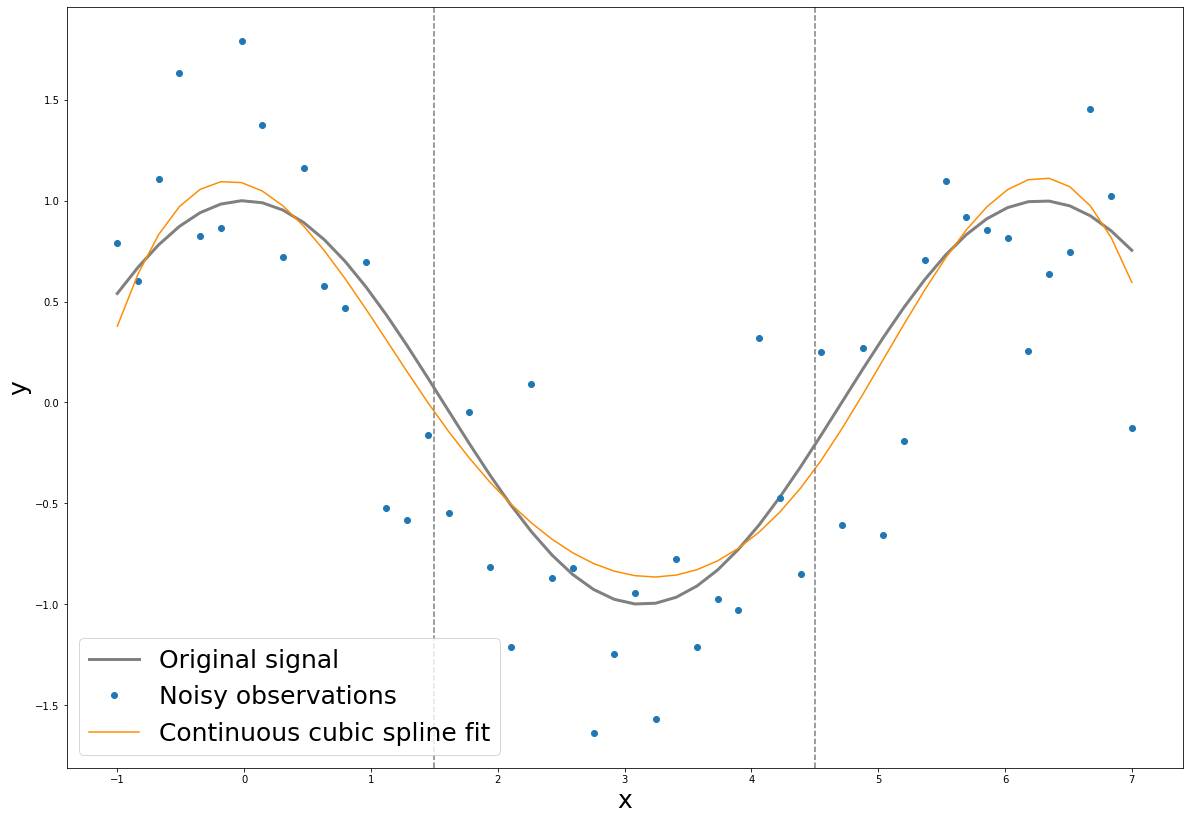

In [6]:
# Construct H
h1 = scipy.ones_like(x_true)
h2 = scipy.copy(x_true)
h3 = h2 ** 2
h4 = h2 ** 3
h5 = scipy.where(x_true < x_knot_1, 0, (x_true - x_knot_1) ** 3)
h6 = scipy.where(x_true < x_knot_2, 0, (x_true - x_knot_2) ** 3)
H = scipy.vstack((h1, h2, h3, h4, h5, h6)).T

# Fit basis expansion via OLS
HH = H.T @ H
beta = linalg.solve(HH, H.T @ y_true)
y_hat = H @ beta

# Plot cosine line and noisy data
fig = plt.figure(figsize=(20, 14))
plt.plot(x_true, y_true, linewidth=3,c='gray')
plt.plot(x_true, y_obs, 'o')
plt.plot(x_true, y_hat, c='darkorange')

# Plot knots
plt.axvline(x=x_knot_1, c='gray', ls='--')
plt.axvline(x=x_knot_2, c='gray', ls='--')
plt.xlabel('x',fontsize=25)
plt.ylabel('y',fontsize=25)
plt.legend(['Original signal','Noisy observations','Continuous cubic spline fit'],fontsize=25)
# plt.savefig('Basis_5.png')
plt.show()

/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_45033/3803678280.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_min, x_knot_1, x_knot_2, x_max = 0, np.int(len(x_true)*0.33), np.int(len(x_true)*0.66), x_true[-1]


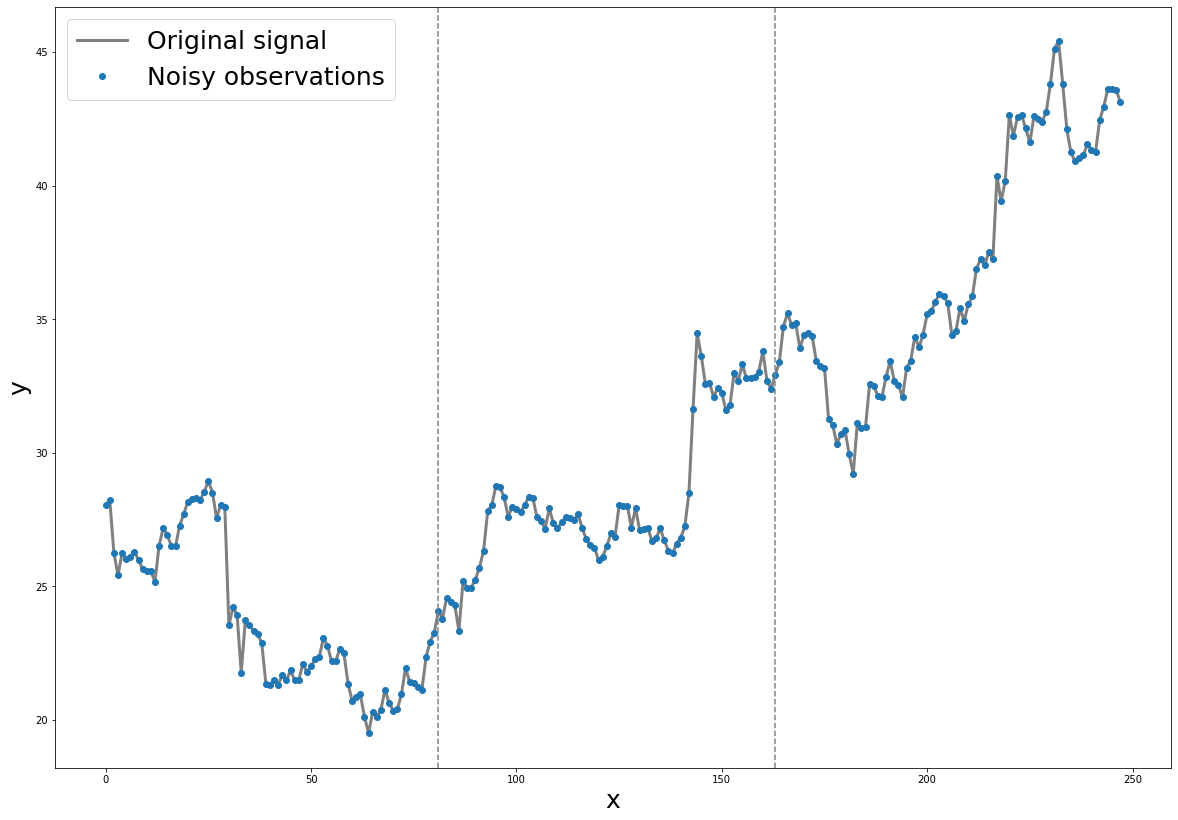

In [2]:
# Load the Whole Food data
dw = pd.read_excel('WholeFood.xlsx')

y_true = dw.Sales.values
y_Obs = dw.Sales.values
y_obs = dw.Sales.values
x_true = np.arange(len(dw))

# Axes limits and knots automated
x_min, x_knot_1, x_knot_2, x_max = 0, np.int(len(x_true)*0.33), np.int(len(x_true)*0.66), x_true[-1]


fig = plt.figure(figsize=(20, 14))
plt.plot(x_true, y_true, linewidth=3, c='gray')
plt.plot(x_true, y_obs, 'o')
# Plot knots
plt.axvline(x=x_knot_1, c='gray', ls='--')
plt.axvline(x=x_knot_2, c='gray', ls='--')
plt.xlabel('x',fontsize=25)
plt.ylabel('y',fontsize=25)
plt.legend(['Original signal','Noisy observations'],fontsize=25)
# plt.savefig('Basis_1.png')
plt.show()

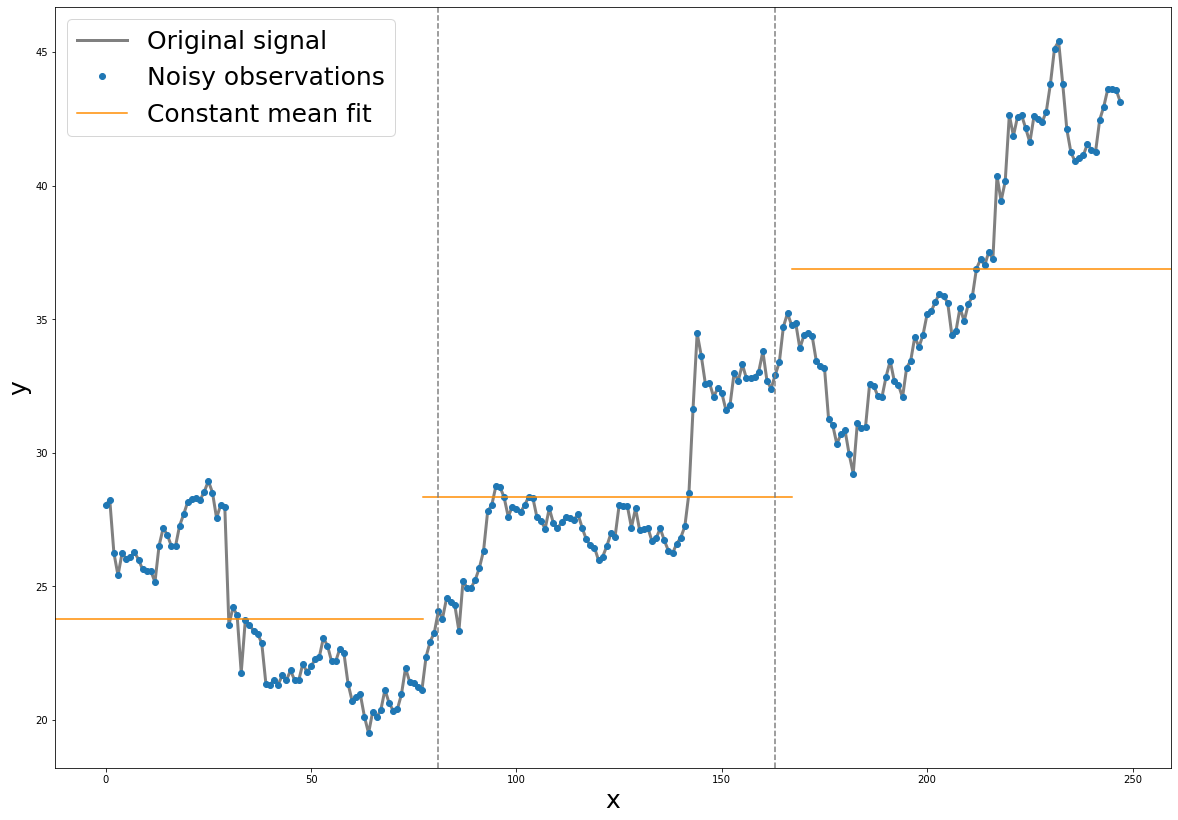

In [3]:
# Begining of titting piecewise functions to the data
# Get x-y coordinates per region
x_region_1 = x_true[x_true <= x_knot_1]
x_region_2 = x_true[(x_knot_1 < x_true) & (x_true < x_knot_2)]
x_region_3 = x_true[x_true >= x_knot_2]
y_region_1 = y_true[x_true <= x_knot_1]
y_region_2 = y_true[(x_knot_1 < x_true) & (x_true < x_knot_2)]
y_region_3 = y_true[x_true >= x_knot_2]

# Piecewise constant fit ------------------------------------------------
# Plot cosine line and noisy data
fig = plt.figure(figsize=(20, 14))
plt.plot(x_true, y_true, linewidth=3, c='gray')
plt.plot(x_true, y_obs, 'o')
# Plot piecewise constant fits
plt.axhline(y=y_region_1.mean(), c='darkorange', xmin=0, xmax=0.33)
plt.axhline(y=y_region_2.mean(), c='darkorange', xmin=0.33, xmax=0.66)
plt.axhline(y=y_region_3.mean(), c='darkorange', xmin=0.66, xmax=1)
# Plot knots
plt.axvline(x=x_knot_1, c='gray', ls='--')
plt.axvline(x=x_knot_2, c='gray', ls='--')
plt.xlabel('x',fontsize=25)
plt.ylabel('y',fontsize=25)
plt.legend(['Original signal','Noisy observations','Constant mean fit'],fontsize=25)
# plt.savefig('Basis_2.png')
plt.show()

In [9]:
print(y_region_1.mean())
print(y_region_2.mean())
print(y_region_3.mean())

23.76353658536585
28.34641975308642
36.86435294117648


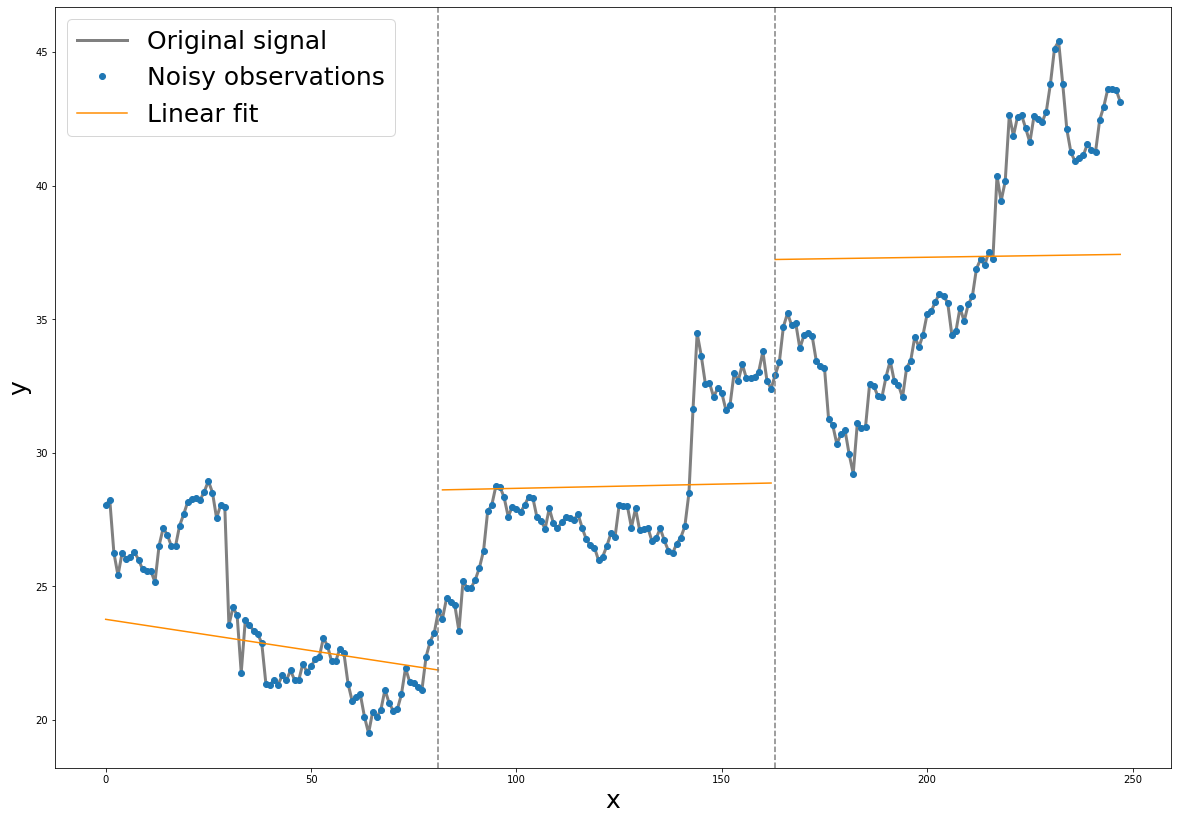

In [4]:
# Piecewise linear fit --------------------------------------------------
# Calculate OLS coefficients from regression anatomy
beta_region_1 = ((y_region_1 - y_region_1.mean()).dot(x_region_1) / 
                (x_region_1**2).sum())
beta_region_2 = ((y_region_2 - y_region_2.mean()).dot(x_region_2) / 
                (x_region_2**2).sum())
beta_region_3 = ((y_region_3 - y_region_3.mean()).dot(x_region_3) / 
                (x_region_3**2).sum())

# Calculate regression fitted values
y_hat_region_1 = beta_region_1 * x_region_1 + y_region_1.mean()
y_hat_region_2 = beta_region_2 * x_region_2 + y_region_2.mean()
y_hat_region_3 = beta_region_3 * x_region_3 + y_region_3.mean()

# Plot cosine line and noisy data
fig = plt.figure(figsize=(20, 14))
plt.plot(x_true, y_true, linewidth=3, c='gray')
plt.plot(x_true, y_obs, 'o')
# Plot piecewise linear fits
plt.plot(x_region_1, y_hat_region_1, c='darkorange')
plt.plot(x_region_2, y_hat_region_2, c='darkorange')
plt.plot(x_region_3, y_hat_region_3, c='darkorange')
# Plot knots
plt.axvline(x=x_knot_1, c='gray', ls='--')
plt.axvline(x=x_knot_2, c='gray', ls='--')
plt.xlabel('x',fontsize=25)
plt.ylabel('y',fontsize=25)
plt.legend(['Original signal','Noisy observations','Linear fit'],fontsize=25)
# plt.savefig('Basis_3.png')
plt.show()

In [6]:
print(beta_region_1)
print(beta_region_2)
print(beta_region_3)

-0.023441706707455524
0.0032051614389815423
0.002267999155464815


/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_45033/1806083437.py:2: DeprecationWarning: scipy.ones_like is deprecated and will be removed in SciPy 2.0.0, use numpy.ones_like instead
  h1 = scipy.ones_like(x_true)
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_45033/1806083437.py:3: DeprecationWarning: scipy.copy is deprecated and will be removed in SciPy 2.0.0, use numpy.copy instead
  h2 = scipy.copy(x_true)
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_45033/1806083437.py:4: DeprecationWarning: scipy.where is deprecated and will be removed in SciPy 2.0.0, use numpy.where instead
  h3 = scipy.where(x_true < x_knot_1, 0, x_true - x_knot_1)
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_45033/1806083437.py:5: DeprecationWarning: scipy.where is deprecated and will be removed in SciPy 2.0.0, use numpy.where instead
  h4 = scipy.where(x_true < x_knot_2, 0, x_true - x_knot_2)
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_45033/

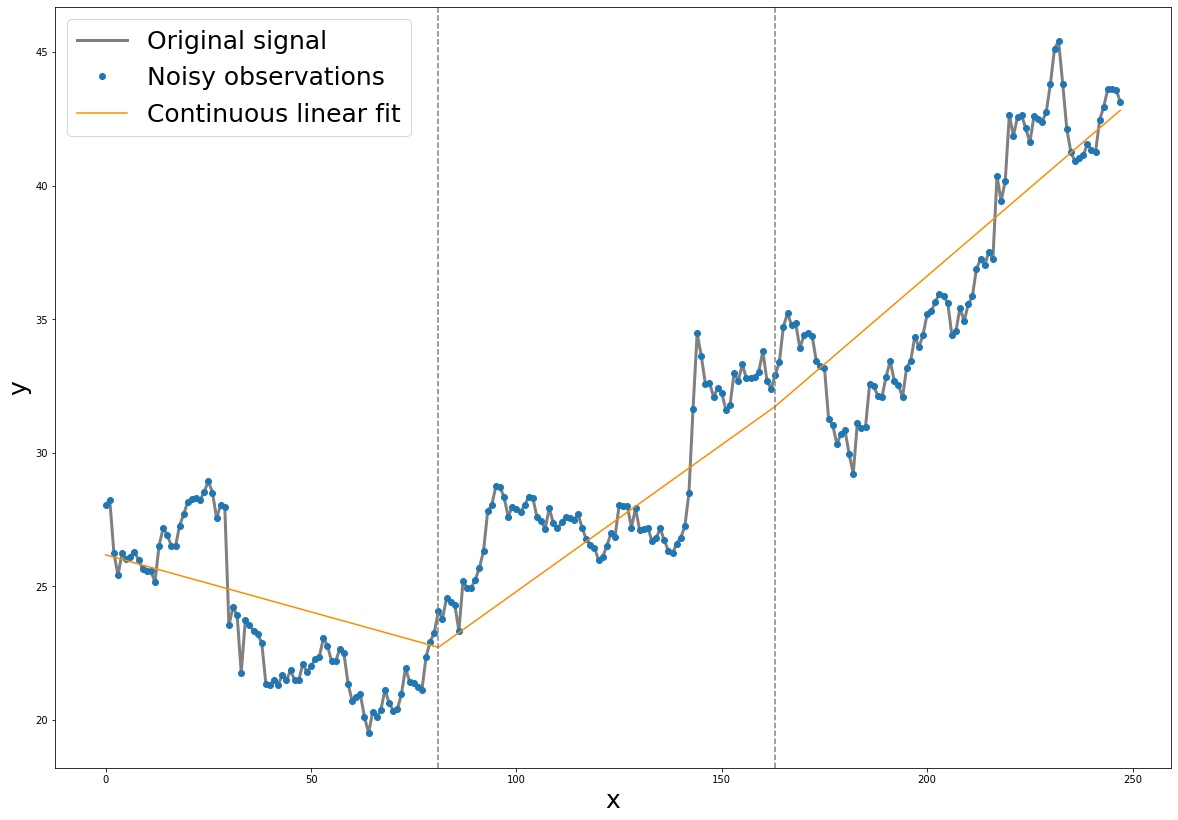

In [5]:
# Continuous Piecewise Linear -------------------------------------------
h1 = scipy.ones_like(x_true)
h2 = scipy.copy(x_true)
h3 = scipy.where(x_true < x_knot_1, 0, x_true - x_knot_1)
h4 = scipy.where(x_true < x_knot_2, 0, x_true - x_knot_2)
H = scipy.vstack((h1, h2, h3, h4)).T
# Fit basis expansion via OLS
HH = H.T @ H
beta = scipy.linalg.solve(HH, H.T @ y_obs)
y_hat = H @ beta

# Plot cosine line and noisy data
fig = plt.figure(figsize=(20, 14))
plt.plot(x_true, y_true, linewidth=3,c='gray')
plt.plot(x_true, y_obs, 'o')
plt.plot(x_true, y_hat, c='darkorange')
# Plot knots
plt.axvline(x=x_knot_1, c='gray', ls='--')
plt.axvline(x=x_knot_2, c='gray', ls='--')
plt.xlabel('x',fontsize=25)
plt.ylabel('y',fontsize=25)
plt.legend(['Original signal','Noisy observations','Continuous linear fit'],fontsize=25)
# plt.savefig('Basis_4.png')
plt.show()
# Plot piecewise linear fits
# plt.plot(x_true,h3*beta[2]+beta[0] + beta[1]*x_knot_1, c='red')
# plt.plot(x_true,h3*beta[2]+beta[0] + beta[1]*h2, c='cyan')
# plt.plot(x_true,h3, c='green')

/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_45033/3226627485.py:2: DeprecationWarning: scipy.ones_like is deprecated and will be removed in SciPy 2.0.0, use numpy.ones_like instead
  h1 = scipy.ones_like(x_true)
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_45033/3226627485.py:3: DeprecationWarning: scipy.copy is deprecated and will be removed in SciPy 2.0.0, use numpy.copy instead
  h2 = scipy.copy(x_true)
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_45033/3226627485.py:6: DeprecationWarning: scipy.where is deprecated and will be removed in SciPy 2.0.0, use numpy.where instead
  h5 = scipy.where(x_true < x_knot_1, 0, (x_true - x_knot_1) ** 3)
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ipykernel_45033/3226627485.py:7: DeprecationWarning: scipy.where is deprecated and will be removed in SciPy 2.0.0, use numpy.where instead
  h6 = scipy.where(x_true < x_knot_2, 0, (x_true - x_knot_2) ** 3)
/var/folders/8r/sf09gm417452y_p81bzf8kp00000gn/T/ip

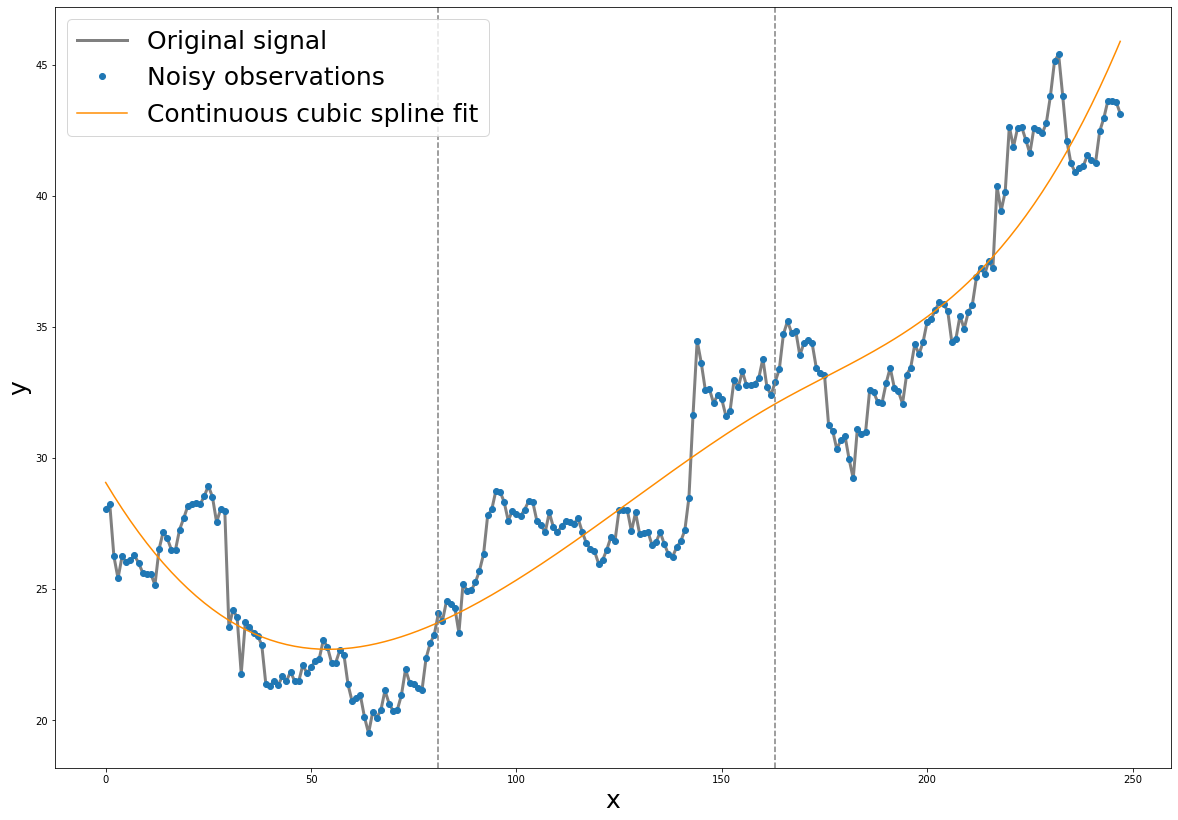

In [7]:
# Construct H
h1 = scipy.ones_like(x_true)
h2 = scipy.copy(x_true)
h3 = h2 ** 2
h4 = h2 ** 3
h5 = scipy.where(x_true < x_knot_1, 0, (x_true - x_knot_1) ** 3)
h6 = scipy.where(x_true < x_knot_2, 0, (x_true - x_knot_2) ** 3)
H = scipy.vstack((h1, h2, h3, h4, h5, h6)).T

# Fit basis expansion via OLS
HH = H.T @ H
beta = linalg.solve(HH, H.T @ y_true)
y_hat = H @ beta

# Plot cosine line and noisy data
fig = plt.figure(figsize=(20, 14))
plt.plot(x_true, y_true, linewidth=3,c='gray')
plt.plot(x_true, y_obs, 'o')
plt.plot(x_true, y_hat, c='darkorange')

# Plot knots
plt.axvline(x=x_knot_1, c='gray', ls='--')
plt.axvline(x=x_knot_2, c='gray', ls='--')
plt.xlabel('x',fontsize=25)
plt.ylabel('y',fontsize=25)
plt.legend(['Original signal','Noisy observations','Continuous cubic spline fit'],fontsize=25)
# plt.savefig('Basis_5.png')
plt.show()